In [169]:
import basis_set_exchange as bse
import scipy as sp
import matplotlib.pyplot as plt
from pyscf import gto,scf
import copy
import numpy as np
import scipy
from scipy.interpolate import interp1d
from pyscf.data.elements import _symbol

In [6]:
import sys
sys.path.append("./Libs")
from FcMole import FcM
from FDcoeffs import get_coeffs

https://pubs.acs.org/doi/abs/10.1021/ed078p391

In [7]:
print(bse.get_basis("pcX-1",fmt="nwchem",elements=["C",7,8,9]))

#----------------------------------------------------------------------
# Basis Set Exchange
# Version v0.8.13
# https://www.basissetexchange.org
#----------------------------------------------------------------------
#   Basis set: pcX-1
# Description: Jensen pcX basis set optimized for core-spectroscopy
#        Role: orbital
#     Version: 1  (Data from Frank Jensen)
#----------------------------------------------------------------------


BASIS "ao basis" PRINT
#BASIS SET: (7s,4p,1d) -> [7s,4p,1d]
C    S
      0.147726E+04           1.0000000
C    S
      0.222361E+03           1.0000000
C    S
      0.505229E+02           1.0000000
C    S
      0.139594E+02           1.0000000
C    S
      0.421475E+01           1.0000000
C    S
      0.653345E+00           1.0000000
C    S
      0.191501E+00           1.0000000
C    P
      0.109571E+02           1.0000000
C    P
      0.232904E+01           1.0000000
C    P
      0.633257E+00           1.0000000
C    P
      0.163150E+00        

In [8]:
n_pcx1=gto.basis.load(bse.get_basis("pcX-1",fmt="nwchem",elements=["N"]),"N")
n_pcx1

[[0, [2004.67, 1.0]],
 [0, [301.707, 1.0]],
 [0, [68.5611, 1.0]],
 [0, [18.9925, 1.0]],
 [0, [5.76941, 1.0]],
 [0, [0.916175, 1.0]],
 [0, [0.264783, 1.0]],
 [1, [14.9507, 1.0]],
 [1, [3.21784, 1.0]],
 [1, [0.87044, 1.0]],
 [1, [0.218852, 1.0]],
 [2, [0.948683, 1.0]]]

In [9]:
c_pcx1=gto.basis.load(bse.get_basis("pcX-1",fmt="nwchem",elements=["C"]),"C")
o_pcx1=gto.basis.load(bse.get_basis("pcX-1",fmt="nwchem",elements=["O"]),"O")
f_pcx1=gto.basis.load(bse.get_basis("pcX-1",fmt="nwchem",elements=["F"]),"F")

In [10]:
#n_pcx1,m_pcx1,c_pcx1

In [11]:
m1=gto.M(atom="N 0 0 0; N 0 0 2.01",unit="Bohrs",basis={"N":n_pcx1})
m2=gto.M(atom="N1 0 0 0; N2 0 0 2.01",unit="Bohrs",basis={"N1":c_pcx1,"N2":o_pcx1})

In [12]:
mf1=scf.RHF(m1)
mf1.scf()
mf2=scf.RHF(m2)
mf2.scf()

converged SCF energy = -108.917141764211
converged SCF energy = -108.891229528654


-108.89122952865371

24.37810945273632

In [214]:
def pcX(z,ref=None):
    if z <1.e-10: raise Exception("non implemented Zero charge atom")
    if z%1 <1.e-10:
        return gto.basis.load(bse.get_basis("pcX-1",fmt="nwchem",elements=[int(z)]),_symbol(int(z)))
    elif ref:
        rb=pcX(ref)
        rbm=pcX(ref-1)
        rbp=pcX(ref+1)
        fb=copy.deepcopy(rb)
        for i in range(len(fb)):  # ref+a(z-zr) +b(z-zr)^2
            a=(rbp[i][1][0]-rbm[i][1][0])/2
            b=(rbp[i][1][0]+rbm[i][1][0]-2*rb[i][1][0])
            fb[i][1][0]+=a*(z-ref)+b*(z-ref)**2
            #if z>ref:
            #    fb[i][1][0]+=(rbp[i][1][0]-rb[i][1][0])*(z-ref)
            #elif z<ref:
            #    fb[i][1][0]+=(rbm[i][1][0]-rb[i][1][0])*(ref-z)
       # zs=np.array([ref-1,ref,ref+1])
       # zm=np.vstack([zs**2,zs,zs**0]).T
       # zm_inv=np.linalg.inv(zm)
       # fb=copy.deepcopy(rb)
       # for i in range(len(fb)):
       #     a,b,c=zm_inv@np.array([rbm[i][1][0],rb[i][1][0],rbp[i][1][0]])
       #     fb[i][1][0]=a*z**2+b*z+c
       #     print (a,b,c, a*6**2+b*6+c)

        return fb
    else: raise Exception("can't get the fractional charge basis set, frac val and no ref")

In [185]:
pcX(6.1,ref=6),pcX(6,ref=6)

([[0, [1526.8669999999997, 1.0]],
  [0, [229.82427999999996, 1.0]],
  [0, [52.219587999999995, 1.0]],
  [0, [14.432537199999999, 1.0]],
  [0, [4.3606396, 1.0]],
  [0, [0.6778998399999998, 1.0]],
  [0, [0.19834036, 1.0]],
  [1, [11.343399999999999, 1.0]],
  [1, [2.4146523999999996, 1.0]],
  [1, [0.6562448199999998, 1.0]],
  [1, [0.16868423999999996, 1.0]],
  [2, [0.8585451799999999, 1.0]]],
 [[0, [1477.26, 1.0]],
  [0, [222.361, 1.0]],
  [0, [50.5229, 1.0]],
  [0, [13.9594, 1.0]],
  [0, [4.21475, 1.0]],
  [0, [0.653345, 1.0]],
  [0, [0.191501, 1.0]],
  [1, [10.9571, 1.0]],
  [1, [2.32904, 1.0]],
  [1, [0.633257, 1.0]],
  [1, [0.16315, 1.0]],
  [2, [0.848528, 1.0]]])

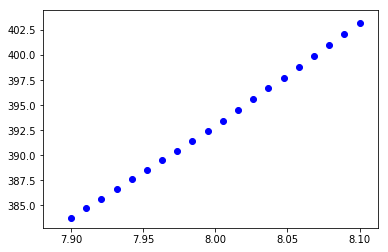

In [209]:
x=np.linspace(7.9,8.1,20)
for i in x:
    plt.scatter(i,pcX(i,ref=8)[1][1][0],color="blue")

In [244]:
def E(l,zbs=True):
    if zbs:
        mol_l=FcM(fcs=[-l,l],atom="N1 0 0 0; N2 0 0 2.05",unit="Bohrs",basis={"N1":pcX(7-l,ref=7),"N2":pcX(7+l,ref=7)},verbose=1)
    else:
         mol_l=FcM(fcs=[-l,l],atom="N1 0 0 0; N2 0 0 2.05",unit="Bohrs",basis={"N1":pcX(7,ref=7),"N2":pcX(7,ref=7)},verbose=1)       
    mf_l=scf.RHF(mol_l)
    #mf_l.conv_tol=1e-12
    #mf_l.conv_tol_grad=1e-12
    e=mf_l.scf(dm0=mf_l.init_guess_by_1e())
    return e

In [246]:
#help(scf)
E(0),E(.1)

(-108.91659161652319, -108.95474861926033)

In [229]:
eT_R=E(-1,zbs=False)

In [230]:
e_co=scf.RHF(gto.M(atom="C 0 0 0; O 0 0 2.05",unit="Bohrs",basis=bse.get_basis("pcX-1"\
                                                       ,fmt="nwchem",elements=["C","N","O"]))).scf()
e_nn=scf.RHF(gto.M(atom="N 0 0 0; N 0 0 2.05",unit="Bohrs",basis=bse.get_basis("pcX-1"\
                                                       ,fmt="nwchem",elements=["C","N","O"]))).scf()

converged SCF energy = -112.716141826715
converged SCF energy = -108.916591616523


In [231]:
#5pts finite difference coefficients
fd1=np.asarray([1/12,-2/3 ,0,2/3,-1/12])
fd2=np.asarray([-1/12,4/3,-5/2,4/3,-1/12])
fd3=np.asarray([-1/2,1,0,-1,1/2])
fd4=np.asarray([1,-4,6,-4,1])
fds=[fd1,fd2,fd3,fd4]
fds5=get_coeffs(5)
fds7=get_coeffs(7)

In [243]:
dl=.05
Es=np.asarray([E(-3*dl),E(-2*dl),E(-dl),e_nn,E(dl),E(2*dl),E(3*dl)])
apdft=[e_nn]
inc=[]
for i in range(6):
    inc.append(fds7[i+1].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1))
    apdft.append(apdft[i]+inc[-1] )
apdft,e_co,inc

([-108.91659161652333,
  -108.91659161652335,
  72203.17895244727,
  72203.17895244727,
  -8192092.060926618,
  -8192092.060926618,
  227930629.07847518],
 -112.71614182671497,
 [-1.2212453270876722e-14,
  72312.09554406379,
  1.7763568394002499e-12,
  -8264295.239879065,
  4.736951571734e-11,
  236122721.1394018])

In [233]:
dl=.05
Es=np.asarray([E(-2*dl),E(-dl),e_nn,E(dl),E(2*dl)])
apdft=[e_nn]
inc=[]
for i in range(4):
    inc.append(fds5[i+1].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1))
    apdft.append(apdft[i]+fds5[i+1].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1) )
apdft,e_co,inc

([-108.91659161652333,
  -108.91659161652332,
  66300.1109239622,
  66300.1109239622,
  -5246461.114712581],
 -112.71614182671497,
 [1.3322676295501878e-14, 66409.02751557872, 0.0, -5312761.225636543])

In [234]:
dl=.05
Es=np.asarray([E(-3*dl,zbs=False),E(-2*dl,zbs=False),E(-dl,zbs=False),e_nn,E(dl,zbs=False),E(2*dl,zbs=False),E(3*dl,zbs=False)])
apdft=[e_nn]
inc=[]
for i in range(6):
    inc.append(fds7[i+1].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1))
    apdft.append(apdft[i]+fds7[i+1].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1) )
apdft,eT_R,e_co,inc

([-108.91659161652333,
  -108.91659161652335,
  72203.17895244727,
  72203.17895244727,
  -8192092.060926618,
  -8192092.060926618,
  227930629.07847518],
 23.414634146341466,
 -112.71614182671497,
 [-1.2212453270876722e-14,
  72312.09554406379,
  1.7763568394002499e-12,
  -8264295.239879065,
  4.736951571734e-11,
  236122721.1394018])

In [44]:
inc

[2.3314683517128287e-12,
 -3.797558466036665,
 -2.0605739337042903e-10,
 0.005169998900100835,
 5.1159076974727205e-09,
 7.163660282256182e-05]

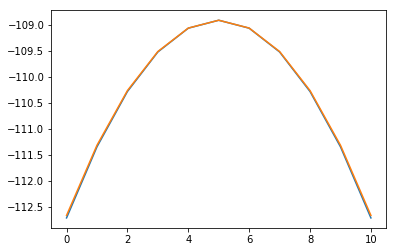

In [215]:
ple=[]
ple0=[]
for i in np.linspace(-1,1,11):
    ple.append(E(i))
    ple0.append(E(i,zbs=False))
plt.plot(ple)
plt.plot(ple0)
ple=np.array(ple)
ple0=np.array(ple0)
#plt.axhline(e_co)

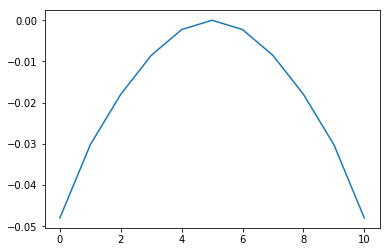

In [216]:
plt.plot(np.array(ple)-np.array(ple0))

In [217]:
scipy.polyfit(np.linspace(-1,1,11),ple-ple0,10)

array([-3.05141194e-02, -3.48776512e-11,  6.18055593e-02,  6.16785304e-11,
       -5.79743974e-02, -3.04075641e-11,  3.66649170e-02,  3.01456198e-12,
       -5.79434430e-02,  5.63714150e-13,  8.52936382e-14])

In [213]:
scipy.polyfit(np.linspace(-1,1,11),ple,10)

array([ 2.05255939e-01, -1.14725258e-11, -4.49372089e-01,  2.81323521e-11,
        3.26619609e-01, -2.35342415e-11, -7.90565292e-02,  7.68433144e-12,
       -3.80299714e+00, -7.46513325e-13, -1.08916592e+02])

In [201]:
scipy.polyfit(np.linspace(-1,1,11),ple,10)

array([-2.12205346e-03, -2.35923730e-11,  2.57663730e-02,  4.80104836e-11,
       -4.37157372e-02, -3.06363212e-11,  4.24117327e-02,  6.57975531e-12,
       -3.82189053e+00, -3.03628560e-13, -1.08916592e+02])

In [202]:
scipy.polyfit(np.linspace(-1,1,11),ple0,10)

array([-3.76737339e-07,  2.36023318e-12, -2.93603540e-05, -4.34915388e-12,
        8.18304717e-05,  2.48861888e-12,  6.52950134e-03, -3.55726480e-13,
       -3.75817032e+00, -1.11866664e-13, -1.08916592e+02])

In [190]:
inc

[-2.1316282072803006e-12,
 -3.8161321307811127,
 1.51582450295488e-10,
 0.043185685664563295]

Conclusions: the basis set prolonngation works, though the series is harder to converge (at least in NN->CO case), therefore accuracy can't go that much below 50 mHa till 8th order !!! <br>
Rieses the need for a better series expression other than McLaurin (polinomial) which is too much generic  